# M2177.003100 Deep Learning <br> Assignment #2 Part 1: Implementing Convolutional Neural Networks

Copyright (C) Data Science & AI Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. 

In this notebook, you will learn how to implement convolutional neural networks (CNNs) <font color=red>**without using deep learning frameworks**</font>. <br>
The goal here is to get better understanding of CNNs before using the **TensorFlow** deep learning framework in part 2&3. <br> 
There are **2 sections**, and in each section, you need to follow the instructions to complete the skeleton codes and explain them.

1. [Forward pass](#1) ( 15 points )
2. [Backward pass](#2) ( 15 points )

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all three parts**, run the *CollectSubmission.sh* script with your **Team number** as input argument. <br>
This will produce a compressed file called *team_#.tar.gz*. Please submit this file on ETL. &nbsp;&nbsp; (Usage example: ./*CollectSubmission.sh* &nbsp; team_77)

### Some helpful tutorials and references for assignment #2:
- [1] TensorFlow official tutorials. [[link]](https://www.tensorflow.org/get_started/get_started)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Iandola et al, "SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and < 0.5MB model size", arXiv 2016. [[pdf]](https://arxiv.org/pdf/1602.07360.pdf)
- [4] Simonyan et al., "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014. [[pdf]](https://arxiv.org/pdf/1312.6034.pdf)
- [5] Szegedy et al., "Intriguing properties of neural networks", ICLR 2014. [[pdf]](https://arxiv.org/pdf/1312.6199.pdf)
- [6] Szegedy et al., "Going deeper with convolutions", CVPR 2015. [[pdf]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)
- [7] Yosinski et al., "Understanding Neural Networks Through Deep Visualization", ICML Workshop 2015. [[pdf]](http://yosinski.com/media/papers/Yosinski__2015__ICML_DL__Understanding_Neural_Networks_Through_Deep_Visualization__.pdf)

## Load datasets
The datasets in the *Utils* directory will be loaded automatically. <br>

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from Utils.data_utils import load_images
from Utils.layer_utils import Test_conv_forward, Test_conv_forward_IP, Test_conv_backward
from Utils.layer_utils import Test_max_pool_forward, Test_max_pool_backward
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load sample images
Sample_images = load_images()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a name="1"></a> 1. Forward pass ( 15 points )

In this section, you will implement forward passes for **(1) convolution with padding=valid** (w/ linear activation), **(2) convolution with padding=same** and **(3) max pooling** layers. 5 points will be allocated for each. Using the code provided as guidance, complete the functions `conv_forward` and `max_pool_forward` in *Utils/layer_utils.py* file. You don't have to worry too much about computational efficiency; just write the code in whatever way you find most clear. 

When you are done, run the following to check your implementations. Difference should be within similar order to given value.

In [85]:
# Compare your convolution forward outputs to ours; difference should be around 4e-8
print('Testing conv_forward for padding=valid')
print('difference: %e\n' % Test_conv_forward(1))

print('Testing conv_forward for padding=same')
print('difference: %e\n' % Test_conv_forward(2))

# Compare your max pooling forward outputs to ours; difference should be around 6e-8
print('Testing max_pool_forward')
print('difference: %e' % Test_max_pool_forward())

Testing conv_forward for padding=valid
difference: 7.961150e-08

Testing conv_forward for padding=same
difference: 1.867278e-06

Testing max_pool_forward
difference: 7.061969e-08


### Aside: Image processing via convolutions

As fun way to both check your implementation and gain a better understanding of the type of operation that convolutional layers can perform, we have manually set up filters that perform common image processing operations (grayscale conversion and edge detection). The convolution forward pass will apply these operations to each of the input images. We can then visualize the results as a sanity check.

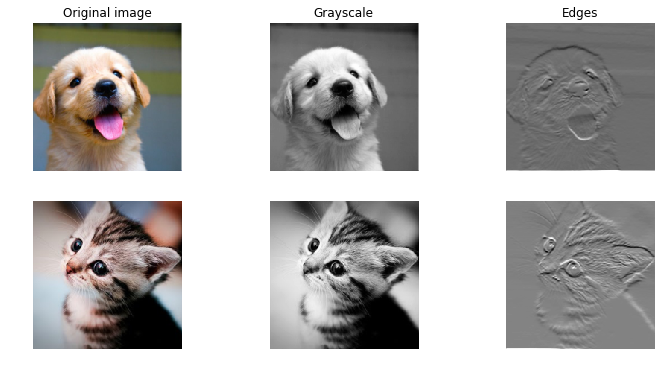

In [86]:
Test_conv_forward_IP(Sample_images)

## <a name="2"></a> 2. Backward pass ( 15 points )

In this section, you will implement backward passes for **(1) convolution with padding=valid** (w/ linear activation), **(2) convolution with padding=same** and **(3) max pooling** layers. 5 points will be allocated for each. Using the code provided as guidance, complete the functions `conv_backward` and `max_pool_backward` in *Utils/layer_utils.py* file. You don't have to worry too much about computational efficiency; just write the code in whatever way you find most clear.

When you are done, run the following to check your implementations.

In [87]:
# Compare your convolution backward outputs to ours; difference should be around 1e-9
print('Testing conv_backward for padding=valid')
Diff1 = Test_conv_backward(1)
print('difference dx: %e' % Diff1[0])
print('difference dw: %e' % Diff1[1])
print('difference db: %e\n' % Diff1[2])

print('Testing conv_backward for padding=same')
Diff2 = Test_conv_backward(2)
print('difference dx: %e' % Diff2[0])
print('difference dw: %e' % Diff2[1])
print('difference db: %e\n' % Diff2[2])

# Compare your max pooling backward outputs to ours; difference should be around 1e-12
print('Testing max_pool_backward')
print('difference dx: %e' % Test_max_pool_backward())

Testing conv_backward for padding=valid
difference dx: 1.000000e+00
difference dw: 3.754421e-01
difference db: 1.000000e+00

Testing conv_backward for padding=same
difference dx: 1.000000e+00
difference dw: 5.187200e-01
difference db: 1.000000e+00

Testing max_pool_backward
difference dx: 1.000000e+00
